Pose Detection with webcam live 

In [2]:
!pip install mediapipe opencv-python

In [3]:
import cv2
import mediapipe as mp
import numpy as np

In [4]:
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

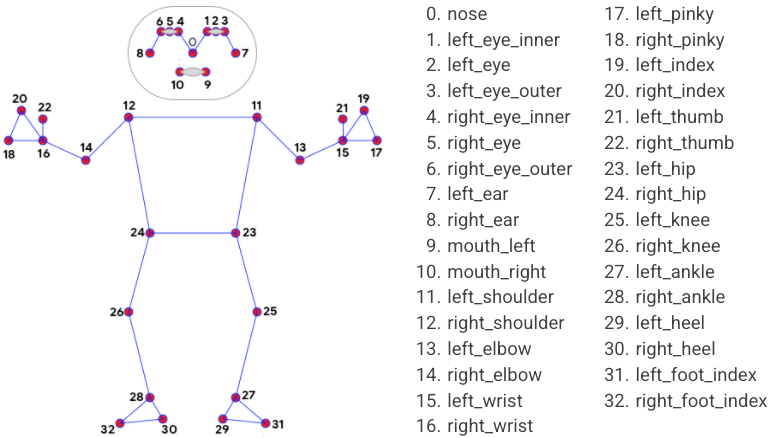

In [5]:
#Picture of pose points 
from IPython.display import Image


Image(filename='/Users/gabriel/TCC/Body Python/pointscorpo.png')

In [6]:
cap = cv2.VideoCapture(0)
## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
      
        # Make detection
        results = pose.process(image)
    
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Extract landmarks
        try:
            landmarks = results.pose_landmarks.landmark
            print(landmarks)
        except:
            pass
        
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )               
        
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

2023-11-16 10:43:58.866 Python[62862:2117730] WARNING: AVCaptureDeviceTypeExternal is deprecated for Continuity Cameras. Please use AVCaptureDeviceTypeContinuityCamera and add NSCameraUseContinuityCameraDeviceType to your Info.plist.
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
2023-11-16 10:44:00.270 Python[62862:2117730] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.


[x: 0.48445377
y: 0.6075287
z: -0.86841613
visibility: 0.9999826
, x: 0.5182259
y: 0.54561853
z: -0.80266875
visibility: 0.99995565
, x: 0.535864
y: 0.5488514
z: -0.8024611
visibility: 0.9999584
, x: 0.5518801
y: 0.5515342
z: -0.8019837
visibility: 0.9999422
, x: 0.46503052
y: 0.5367539
z: -0.79512763
visibility: 0.9999554
, x: 0.45018402
y: 0.53526926
z: -0.79416555
visibility: 0.9999528
, x: 0.43885008
y: 0.53440356
z: -0.79433525
visibility: 0.99993145
, x: 0.5817839
y: 0.5878203
z: -0.43751457
visibility: 0.9999578
, x: 0.4321103
y: 0.57178783
z: -0.38423356
visibility: 0.9999609
, x: 0.5192998
y: 0.6917542
z: -0.73850054
visibility: 0.9999528
, x: 0.45721436
y: 0.68399465
z: -0.7244226
visibility: 0.9999516
, x: 0.71501464
y: 0.9512206
z: -0.3313885
visibility: 0.9978027
, x: 0.32108757
y: 0.98821694
z: -0.13759002
visibility: 0.98832977
, x: 0.928206
y: 0.90967077
z: -0.9935886
visibility: 0.932051
, x: 0.27034152
y: 1.5177796
z: -0.06854863
visibility: 0.06771801
, x: 0.688532
y

In [7]:
#These landmarks can be used to perform other operations

In [9]:
len(landmarks)

33

In [10]:
#Example of landmarks
landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value]

x: 0.88818276
y: 1.3051827
z: -0.9982592
visibility: 0.297222

In [13]:
shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
index = [landmarks[mp_pose.PoseLandmark.LEFT_INDEX.value].x,landmarks[mp_pose.PoseLandmark.LEFT_INDEX.value].y]                                                                                                                                            

In [14]:
shoulder, elbow, wrist, index

([0.7655726075172424, 0.8976559638977051],
 [0.8881827592849731, 1.305182695388794],
 [0.7451381683349609, 1.111379623413086],
 [0.6898269653320312, 1.017379641532898])